In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.optimize import fsolve

In [161]:
#global variables 
k_b = 1.381e-23 #m^2 Kg s^-2 K^-1
T = 398 #K
N = 4e24 #number/m^3
d_z = 8e-9 #m
h_bar = 1.054e-34 #m^2 Kg s^-1
m_e = 9.109e-31 #Kg
m_star = 0.067 * m_e #Kg, assuming use this mass
q = 1.602e-19
E1_inf = (np.pi*h_bar/d_z)**2 /2/m_star 

In [126]:
def n_max(V0):
    nmax = 1
    ineq = V0/E1_inf
    root_val = np.sqrt(ineq)
    nmax = root_val #continuous
    return nmax

def n_QW(nmax):
    n_QWs = []
    number = int(nmax + 1)
    if nmax%2 == 0:
        number -= 1
    for i in range(number): #changed from number OK so unsure which version should be used
        if i%2 == 1:
            x=(nmax,i)
            root = fsolve(antiSym,i,x)
            c = 1
            while root[0] > i+1: #got weird value, from not limitting nQW < n max in the fsolve function
                root = fsolve(antiSym,0.2*c,x) 
                c+= 1

            n_QWs.append(root[0])
            
        if i%2 == 0:
            x=(nmax,i)
            root = fsolve(Sym,i+0.7,x)
            n_QWs.append(root[0])
            
    return n_QWs

def E_nQW(nQW):
    #assuming 1D case...
    return nQW**2*E1_inf

def solve_V0(V0): #shouldn't have any other arguments 
    nmax = n_max(V0) #get nmax for specified V0
    n_QWs = n_QW(nmax) #get possible n_qw under nmax
    
    summation = 0
    for i in range(len(n_QWs)): #summing all possible eiganvalues
        E_n = E_nQW(n_QWs[i])
        expo_val = np.exp((V0-5*k_b*T-E_n)/k_b/T)
        summation += np.log(1+expo_val)
    
    pre_fact = k_b * T * m_star / (np.pi*h_bar**2*d_z) #prefactor
    solution = N - pre_fact * summation #minimize solution
    
    return solution #,nmax ADD LATER

In [127]:
def antiSym(nQW,*x): #x = (nMAX,n) 
    if np.abs(nQW) > np.abs(x[0]):
        val = x[1]
        return val
    
    val = nQW*np.tan(nQW*np.pi/2 - (np.pi/2)) - np.sqrt(x[0]**2-nQW**2)
    
    return val

def Sym(nQW,*x):
    if np.abs(nQW) > np.abs(x[0]):
        val = x[1]
        return val
    
    val = nQW*np.tan(nQW*np.pi/2) - np.sqrt(x[0]**2-nQW**2)
    return val

In [200]:
#not sure if I should include these tests...
n1 = n_QW(1)
n2 = n_QW(2)
n3 = n_QW(3)
n4 = n_QW(4)
n5 = n_QW(5)
n6 = n_QW(6)
n7 = n_QW(7)
n8 = n_QW(8)

print(n1)
print(n2)
print(n3)
print(n4) 
print(n5) 
print(n6)
print(n7) 
print(n8)

[0.5946116440568356, 1.0]
[0.75393401878655, 1.4729688964830332]
[0.8230701877419335, 1.6334512103473886, 2.407135242432696, 3.0]
[0.8617624610112613, 1.7174725807435083, 2.5582343145438626, 3.363949617477295]
[0.8865242831639736, 1.7696853948107552, 2.645116771779846, 3.505402668983094, 4.332682108169458, 5.0]
[0.9037434983659394, 1.8054233246764402, 2.702545483641969, 3.591465624243856, 4.465598564079858, 5.308628772660085]
[0.9164159931702468, 1.8314739458327136, 2.7436056242396667, 3.650721678148776, 4.549587162009644, 5.434177252389119, 6.289347263329266, 7.0]
[0.9261349054687865, 1.851328288369634, 2.774525842603149, 3.694406940248427, 4.609116899213383, 5.515694232193931, 6.408532523441488, 7.273422477189486]


In [129]:
def midpoint(aL,bL):
    return (bL-aL)/2 + aL

def tolerance(value,err): #value of midpoint
    geez = False
    if (np.abs(value) < err):
        geez = True
    return geez

def get_points(funct,a,m,b,*x):
    aN = funct(a,*x)
    mN = funct(m,*x)
    bN = funct(b,*x)
    
    return aN,mN,bN

def bisection(funct,a,b,err): 
    #Takes a function, end points (b>a), and a specified tolerance 
    #assuming only one root
    
    geez2 = False #loop runner
    mid_X = "not a number"
    mid_Y = "ow"
    
    #intial x points
    ai = a
    bi = b
    mi = midpoint(a,b)
    
    #intial y points
    y1,y2,y3 = get_points(funct,a,mi,b)
    geez2 = tolerance(y2,err)

    
    c = 0
    
    while(geez2==False):
        if ((y1<0 and y2>0)or(y1>0 and y2<0)):
            bi = mi
            mi = midpoint(ai,bi)
            
        if ((y2>0 and y3<0)or(y2<0 and y3>0)): #assuming one end point
            ai = mi
            mi = midpoint(ai,bi)

        
        #new points
        #print(mi)
        y1,y2,y3 = get_points(funct,ai,mi,bi)
        
        #check if new value is within range
        geez2 = tolerance(y2,err)
        
            
            
    mid_X = mi
    mid_Y = y2
    
    print("The root was found at: " + str(mid_X) + " with a value of: " +str(mid_Y) + " which is within the tolerance of " + str(err))
    return mid_X

In [130]:
#implementing my own solving function now... #make a convergence plot
V0_val = bisection(solve_V0,2e-20,1e-18,1e9) #find V0, initial guess is ~20*k_b*T

The root was found at: 5.1591120761387923e-20 with a value of: 536870912.0 which is within the tolerance of 1000000000.0


In [131]:
#plotting V0 i guess
V0_space = np.linspace(2e-20,10e-20)
solution_space = []
for i in range(50):
    solution_space.append(solve_V0(V0_space[i]))

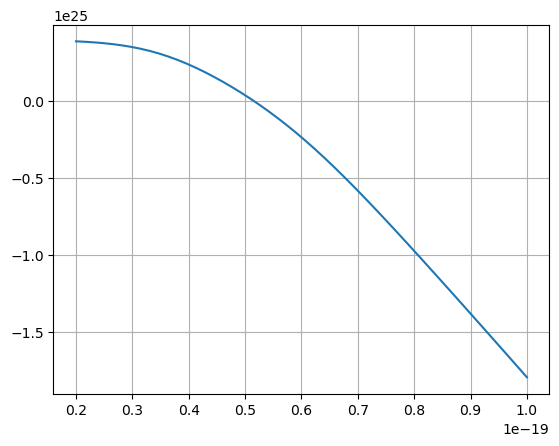

In [132]:
plt.plot(V0_space,solution_space)
plt.grid()

In [48]:
print(V0_val) #this is the V0 that we need
V0_eV = V0_val * 6.242e18 
print(V0_eV)

5.1591120761387923e-20
0.3220317757925834


In [49]:
V0_val / E1_inf
print(np.sqrt(V0_val / E1_inf))

1.9172322906859762


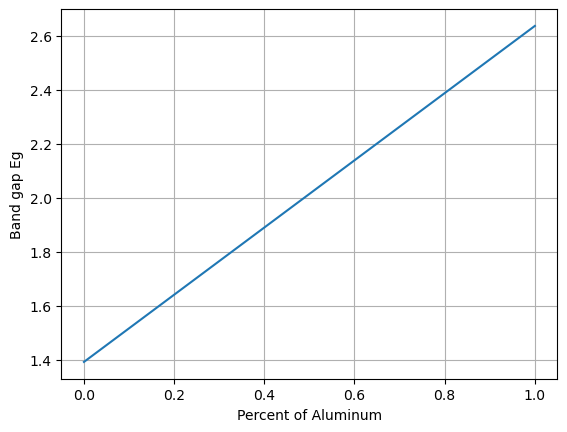

In [133]:
#these are all in Ev
Eg_Al0_0 = 1.519 #also intercept
Eg_Al0_300 = 1.424 #also intercept
Eg_Al20_0 = 1.769
Eg_Al20_300 = 1.673

mAl0 = (Eg_Al0_300 - Eg_Al0_0) / 300 #slope of lines
mAl20 = (Eg_Al20_300 - Eg_Al20_0) / 300

Eg_Al0_400 = mAl0*T + Eg_Al0_0 #Eg for 0% Al at 398k
Eg_Al20_400 = mAl20*T + Eg_Al20_0 #Eg for 20% Al at 398k

m_perAl = (Eg_Al20_400 - Eg_Al0_400) / 0.2 #slope of Eg vs. %Al @398k

Al_percent = np.linspace(0,1,num=1001) #percent of Al in 0.001 size steps

Eg_perAl_400 = Eg_Al0_400 + Al_percent*m_perAl

plt.plot(Al_percent,Eg_perAl_400)
plt.ylabel("Band gap Eg")
plt.xlabel("Percent of Aluminum")
plt.grid()

CHANGE THIS!!!

$\Delta E_{c} = V_{0} $ and $\Delta E_{v} = \frac{1}{3} \Delta E_{c}$

$\Delta E_{g} = E_{g}(Al_{x}GaAs) - E_{g}(GaAs) = \Delta E_{c} + \Delta E_{v} = \frac{4}{3}V_{0}$

So: $E_{g}(Al_{x}GaAs) = \frac{4}{3}V_{0} + E_{g}(GaAs,T=398K)$

In [134]:
desired_Eg = 3/2 * V0_eV + Eg_Al0_400  #3/2 not 4/3
Al_per_desired = (desired_Eg - Eg_Al0_400) / m_perAl

print("The percent of Aluminum needed is: ", Al_per_desired) #still not happy with this, need to review problem one

The percent of Aluminum needed is:  0.3884997697291289


In [ ]:
#question 2...
#v = (E_f - E)/kt, r = N/N_c

#constants down here...
k_b = 1.381e-23 #m^2 Kg s^-2 K^-1
T = 398 #K
N = 4e24 #number/m^3
d_z = 8e-9 #m
h_bar = 1.054e-34 #m^2 Kg s^-1
m_e = 9.109e-31 #Kg
m_star = 0.067 * m_e #Kg, assuming use this mass

E1_inf = (np.pi*h_bar/d_z)**2 /2/m_star 

N_c = 2 * (m_star*k*300/2/np.pi/h_bar)**1.5 #new temperature



In [147]:
def JD(r):
    A1 = 8**(-0.5)
    A2 = -4.95009e-3
    A3 = 1.48386e-4
    A4 = -4.42563e-6
    v = np.log(r) +  A1*r +A2*r**2 + A3*r**3 + A4*r**4 
    return v

In [81]:
def nil(r):
    fh = (3*np.sqrt(np.pi)*r/4)**(2/3)
    v = np.log(r)/(1-r**2) + fh / (1+(0.24+1.08*fh)**(-2))
    return v

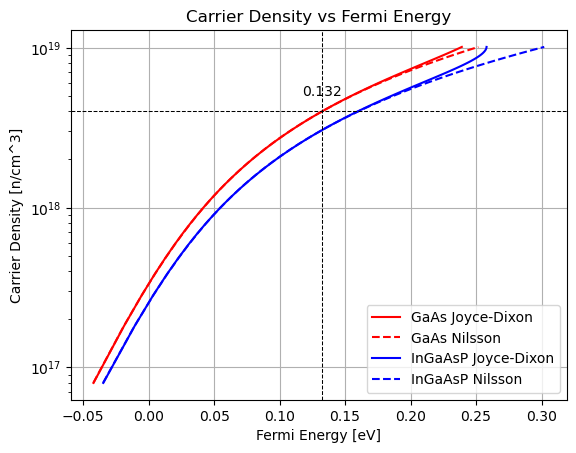

In [198]:
#question 2...
#plot 
#v = (E_f - E)/kt, r = N/N_c
#not sure about q 
h_bar_ev = 6.582e-16
Nc_GaAs = 2 * (m_star*k_b*300/2/np.pi/h_bar**2)**1.5 #new temperature

m_IGAP = 0.056 * m_e
Nc_IGAP = 2 * (m_IGAP*k_b*300/2/np.pi/h_bar**2)**1.5


#N space, is this the right way to do it? 
start = 8e16
stop = 1.01e19

N_space = np.linspace(start,stop,num=100)

r_GaAs = N_space/(Nc_GaAs/1e6)
r_IGAP = N_space/(Nc_IGAP/1e6)


#GaAs
v_JD_GaAs = JD(r_GaAs)
v_nil_GaAs = nil(r_GaAs)

Ef_JD_GaAs = v_JD_GaAs*k_b*300/q
Ef_nil_GaAs = v_nil_GaAs*k_b*300/q

#InGaAsP
v_JD_IGAP = JD(r_IGAP)
v_nil_IGAP = nil(r_IGAP)

Ef_JD_IGAP = v_JD_IGAP*k_b*300/q
Ef_nil_IGAP = v_nil_IGAP*k_b*300/q


plt.plot(Ef_JD_GaAs,N_space,'r',label="GaAs Joyce-Dixon")
plt.plot(Ef_nil_GaAs,N_space,"r--",label="GaAs Nilsson")
plt.plot(Ef_JD_IGAP,N_space,'b',label="InGaAsP Joyce-Dixon")
plt.plot(Ef_nil_IGAP,N_space,"b--",label="InGaAsP Nilsson")
plt.yscale("log")
plt.grid()
plt.xlabel("Fermi Energy [eV]")
plt.ylabel("Carrier Density [n/cm^3]")
plt.legend()
plt.title("Carrier Density vs Fermi Energy")
plt.axhline(N2b,color='black',linestyle='--',linewidth='0.75')
plt.axvline(Ef_ev,color='black',linestyle='--',linewidth='0.75')
plt.text(0.117,N2b+1e18,s='0.132')
plt.savefig("Carrier Density vs Fermi Energy")

In [171]:
#part b
#determine fermi level with carrier density N = 4e18
def JD_b(r):
    A1 = 8**(-0.5)
    A2 = -4.95009e-3
    A3 = 1.48386e-4
    A4 = -4.42563e-6
    v = np.log(r) +  A1*r +A2*r**2 + A3*r**3 + A4*r**4 
    v_off = v
    return v

N2b = 4e18
Ef_SI = JD_b(N2b/(Nc_GaAs/1e6))
Ef_ev = Ef_SI *k_b * 300 /q
print(Ef_ev)

0.1325721447029751


In [172]:
N2b = 4e18
Ef_SI_n = nil(N2b/(Nc_GaAs/1e6))
Ef_ev_n = Ef_SI_n *k_b * 300 /q
print(Ef_ev_n)

0.1325750189953055
